# Clustering

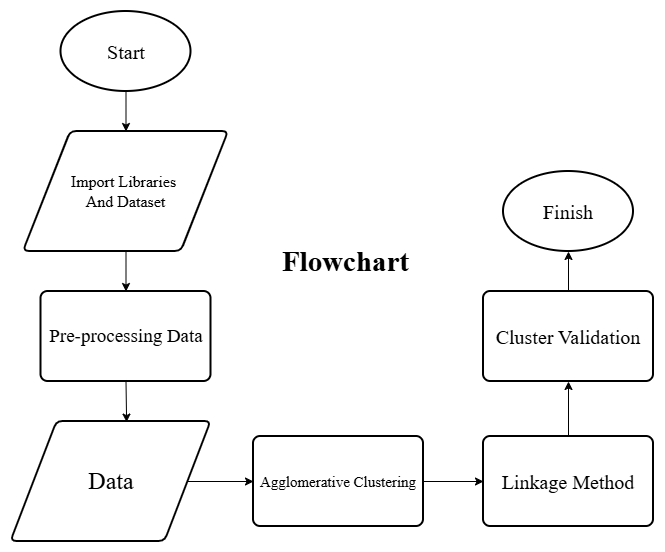

# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Import Datasets

In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive')
customer = pd.read_csv("/content/gdrive/My Drive/Colab/tugas clustering.csv")
customer.info()

Mounted at /content/gdrive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age                   1000 non-null   int64
 1   Annual_Premium        1000 non-null   int64
 2   Policy_Sales_Channel  1000 non-null   int64
 3   Vintage               1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB


Terdapat 4 variabel dengan 1000 entries

# Pre-processing Data

In [ ]:
customer.head()

,Age,Annual_Premium,Policy_Sales_Channel,Vintage
0,22,36513,160,189
1,24,2630,160,268
2,22,35832,152,289
3,72,36685,26,113
4,66,2630,45,123


## Data Cleaning

In [ ]:
# check missing value
customer.isna().sum()

,0
Age,0
Annual_Premium,0
Policy_Sales_Channel,0
Vintage,0


Tidak terdapat missing value di dalam data

In [ ]:
# check duplicated id
customer.duplicated(subset="Policy_Sales_Channel").sum()

np.int64(950)

Tidak terdapat data duplicated berdasarkan variabel Policy_Sales_Channel

In [ ]:
# drop kolom ID karena tidak bermakna
customer = customer.drop(columns="Policy_Sales_Channel")

drop/hapus variabel Policy_Sales_Channel karena hanya Kode numerik kategorikal bukan nilai numerik yang menggambarkan hubungan atau jarak

In [ ]:
# deskripsi statistik
customer.describe()

,Age,Annual_Premium,Vintage
count,1000.000000,1000.000000,1000.000000
mean,39.653000,30364.102000,154.565000
std,15.776929,16348.152121,83.320815
min,20.000000,2630.000000,10.000000
25%,25.000000,24415.250000,88.000000
50%,38.000000,31511.500000,154.000000
75%,50.250000,39555.750000,227.000000
max,85.000000,100278.000000,299.000000


Karena terdapat perbedaan skala antar variabel maka dilakukan feature scaling

## feature scaling

In [ ]:
# minmax scaler sklearn
scaler = MinMaxScaler()
customer_scaled = scaler.fit_transform(customer)
pd.DataFrame(customer_scaled).describe()

,0,1,2
count,1000.000000,1000.000000,1000.000000
mean,0.302354,0.284021,0.500225
std,0.242722,0.167419,0.288307
min,0.000000,0.000000,0.000000
25%,0.076923,0.223100,0.269896
50%,0.276923,0.295772,0.498270
75%,0.465385,0.378152,0.750865
max,1.000000,1.000000,1.000000


Menyelaraskan skala data ke rentang [0, 1]

## visualisasi

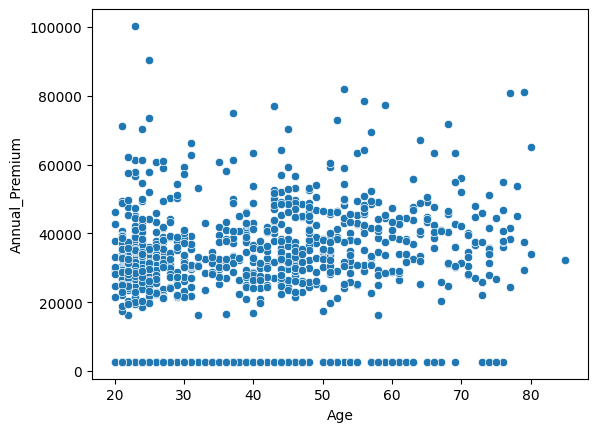

In [ ]:
# scatter plot
sns.scatterplot(data=customer, x="Age",y="Annual_Premium")
plt.show()

Menampilkan hubungan antara Age dan Annual_Premium.

Scatter plot ini memberi gambaran kasar apakah ada pola pengelompokan alami di data.

# Agglomerative Clustering

## Metode linkage single

In [ ]:
# train agglomerative clustering with 5 clusters, linkage="single"
agg_clus_single = AgglomerativeClustering(n_clusters=5,linkage="single")
agg_clus_single.fit(customer_scaled)

AgglomerativeClustering(linkage='single', n_clusters=5)

Melakukan Hierarchical Clustering dengan linkage “single” (jarak minimum antar titik) dengan menetapkan 5 cluster

In [ ]:
# assign clusters to customer dataframe
customer["label_single"] = agg_clus_single.labels_
customer.head()

,Age,Annual_Premium,Vintage,label_single
0,22,36513,189,0
1,24,2630,268,0
2,22,35832,289,0
3,72,36685,113,0
4,66,2630,123,0


Label hasil cluster disimpan dalam kolom label_single

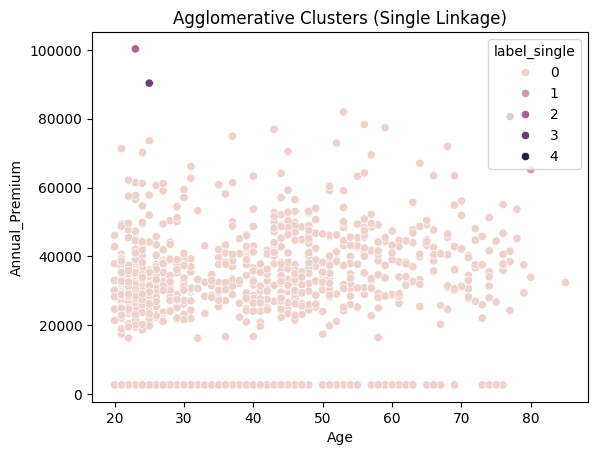

In [ ]:
# draw as scatter plot
sns.scatterplot(data=customer, x="Age",y="Annual_Premium",hue="label_single")
plt.title("Agglomerative Clusters (Single Linkage)")
plt.show()

Cluster hasil single linkage tidak praktikal (berguna secara nyata) karena sebagian besar titik masuk ke cluster 0 (fenomena chaining effect atau data saling “menarik” jadi satu kelompok besar).

## Metode linkage ward

In [ ]:
# train agglomerative clustering with 5 clusters, linkage="ward"
agg_clus_ward = AgglomerativeClustering(n_clusters=5,linkage="ward")
agg_clus_ward.fit(customer_scaled)

AgglomerativeClustering(n_clusters=5)

Melakukan Hierarchical Clustering dengan linkage “ward” (mencari pasangan-pasangan cluster yang meminimumkan variance ketika digabung) dengan menetapkan 5 cluster

In [ ]:
# assign clusters to customer dataframe
customer["label_ward"] = agg_clus_ward.labels_
customer.head()

,Age,Annual_Premium,Vintage,label_single,label_ward
0,22,36513,189,0,4
1,24,2630,268,0,1
2,22,35832,289,0,4
3,72,36685,113,0,3
4,66,2630,123,0,0


Label hasil cluster disimpan dalam kolom label_ward

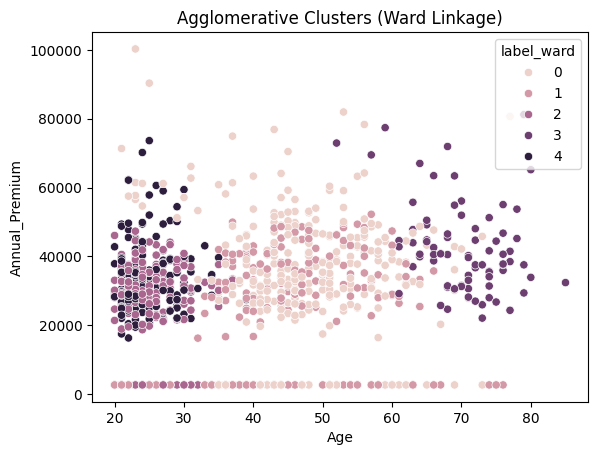

In [ ]:
# draw as scatter plot
sns.scatterplot(data=customer, x="Age",y="Annual_Premium",hue="label_ward")
plt.title("Agglomerative Clusters (Ward Linkage)")
plt.show()

Hasil visualisasi terlihat lebih jelas dan terpisah antar cluster

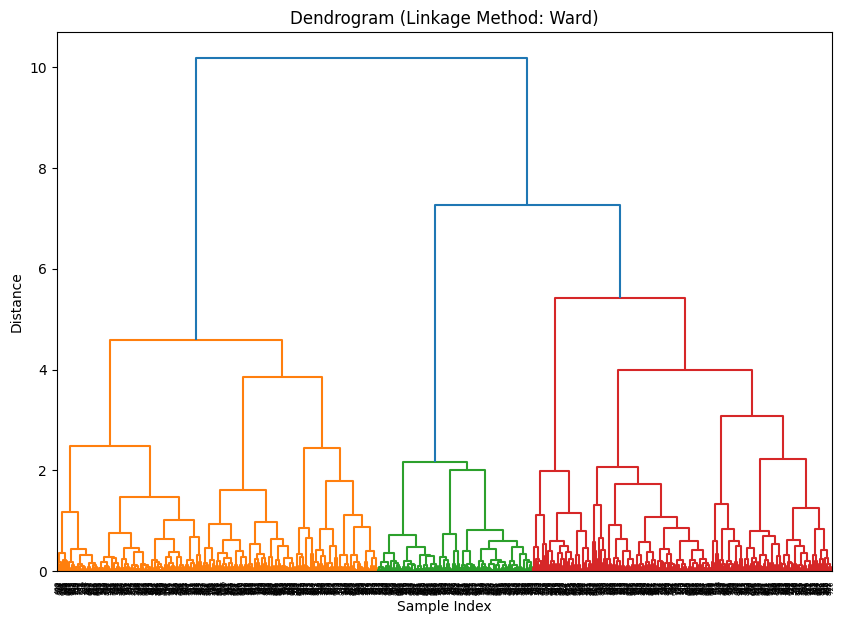

In [ ]:
# Plot the dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(customer_scaled, method="ward")

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title(f'Dendrogram (Linkage Method: Ward)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

Menampilkan struktur hierarki penggabungan cluster. Namun karena data 1000 titik, dendrogram menjadi sulit dibaca dan hanya membantu melihat jarak antar penggabungan cluster.

## Metode linkage average

In [ ]:
# train agglomerative clustering with 5 clusters, linkage="average"
agg_clus_average = AgglomerativeClustering(n_clusters=5,linkage="average")
agg_clus_average.fit(customer_scaled)

AgglomerativeClustering(linkage='average', n_clusters=5)

Melakukan Hierarchical Clustering dengan linkage “average” (rata-rata jarak dari semua kombinasi pasangan cluster) dengan menetapkan 5 cluster

In [ ]:
# assign clusters to customer dataframe
customer["label_average"] = agg_clus_average.labels_
customer.head()

,Age,Annual_Premium,Vintage,label_single,label_ward,label_average
0,22,36513,189,0,4,2
1,24,2630,268,0,1,2
2,22,35832,289,0,4,2
3,72,36685,113,0,3,0
4,66,2630,123,0,0,0


Label hasil cluster disimpan dalam kolom label_average

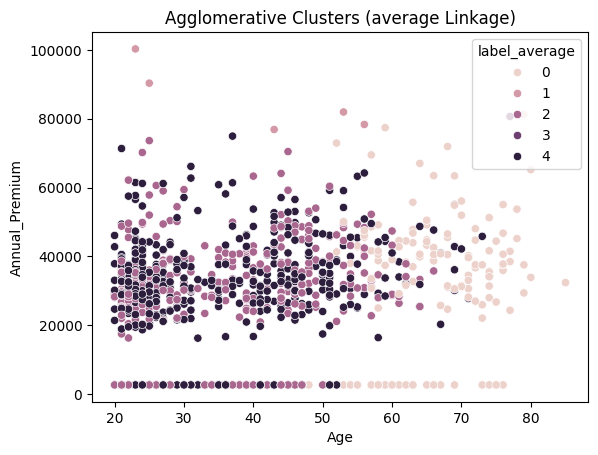

In [ ]:
# draw as scatter plot
sns.scatterplot(data=customer, x="Age",y="Annual_Premium",hue="label_average")
plt.title("Agglomerative Clusters (average Linkage)")
plt.show()

Scatter plot menunjukkan pola pengelompokan yang cukup rapi

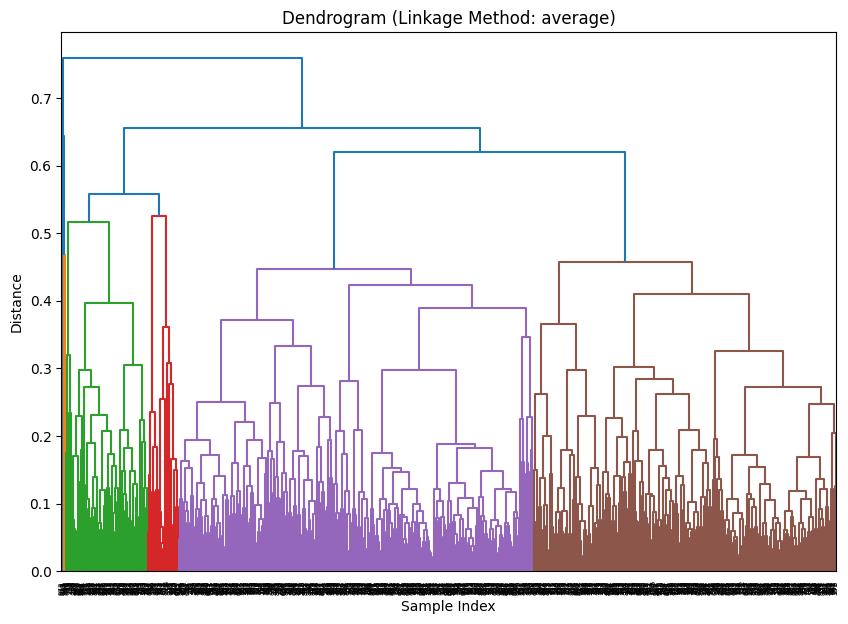

In [ ]:
# Plot the dendrogram
linkage_matrix = linkage(customer_scaled, method="average")

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title(f'Dendrogram (Linkage Method: average)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

Menampilkan struktur hierarki penggabungan cluster. Namun karena data 1000 titik, dendrogram menjadi sulit dibaca dan hanya membantu melihat jarak antar penggabungan cluster.

## Metode linkage complete

In [ ]:
# train agglomerative clustering with 5 clusters, linkage="complete"
agg_clus_complete = AgglomerativeClustering(n_clusters=5,linkage="complete")
agg_clus_complete.fit(customer_scaled)

AgglomerativeClustering(linkage='complete', n_clusters=5)

Melakukan Hierarchical Clustering dengan linkage “complete” (jarak maksimum antar titik) dengan menetapkan 5 cluster

In [ ]:
# assign clusters to customer dataframe
customer["label_complete"] = agg_clus_complete.labels_
customer.head()

,Age,Annual_Premium,Vintage,label_single,label_ward,label_average,label_complete
0,22,36513,189,0,4,2,4
1,24,2630,268,0,1,2,0
2,22,35832,289,0,4,2,0
3,72,36685,113,0,3,0,2
4,66,2630,123,0,0,0,2


Label hasil cluster disimpan dalam kolom label_complete

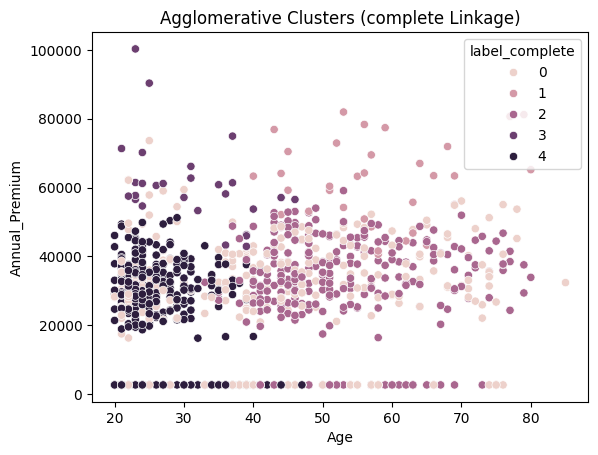

In [ ]:
# draw as scatter plot
sns.scatterplot(data=customer, x="Age",y="Annual_Premium",hue="label_complete")
plt.title("Agglomerative Clusters (complete Linkage)")
plt.show()

Scatter plot memperlihatkan pengelompokan yang cukup baik

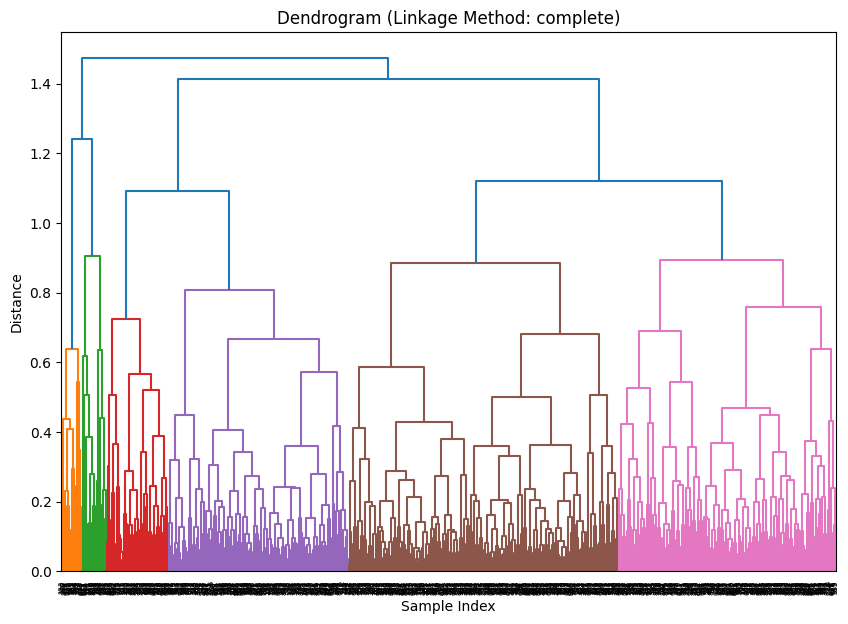

In [ ]:
# Plot the dendrogram
linkage_matrix = linkage(customer_scaled, method="complete")

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title(f'Dendrogram (Linkage Method: complete)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

Menampilkan struktur hierarki penggabungan cluster. Namun karena data 1000 titik, dendrogram menjadi sulit dibaca dan hanya membantu melihat jarak antar penggabungan cluster.

# cluster validation menggunakan koefisien silhouette

Kriteria pengukuran nilai Silhouette coefficient disajikan pada tabel dibawah

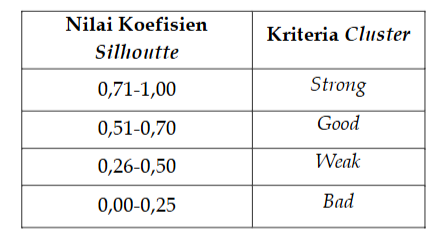

Nilai rata-rata Silhouette menunjukkan kedekatan dan
kemiripan data yang dikelompokkan dalam satu
cluster. Jika nilai rata-rata koefisien silhoutte
semakin mendekati 1 berarti suatu objek
sudah berada dalam cluster yang tepat

In [ ]:
# --- Definisikan metode linkage dan jenis jarak yang akan diuji ---
linkages = ['single', 'complete', 'average', 'ward']
metrics = ['euclidean', 'manhattan', 'canberra']

# --- Dictionary untuk menyimpan hasil ---
results = []

for linkage in linkages:
    for metric in metrics:
        # Ward hanya mendukung Euclidean
        if linkage == 'ward' and metric != 'euclidean':
            results.append([linkage, metric, np.nan])
            continue

        # Model Agglomerative Clustering
        model = AgglomerativeClustering(n_clusters=5, linkage=linkage, metric=metric)
        labels = model.fit_predict(customer_scaled)

        # Hitung silhouette score
        score = silhouette_score(customer_scaled, labels, metric=metric)
        results.append([linkage, metric, round(score, 2)])

# --- Ubah ke DataFrame agar berbentuk tabel seperti gambar ---
df_results = pd.DataFrame(results, columns=['Metode', 'Jarak', 'Silhouette'])
tabel = df_results.pivot(index='Metode', columns='Jarak', values='Silhouette')

# --- Urutkan sesuai urutan tabel kamu ---
tabel = tabel.loc[['single', 'complete', 'average', 'ward'], ['euclidean', 'manhattan', 'canberra']]
tabel.columns = ['Jarak Euclidean', 'Jarak Manhattan', 'Jarak Canberra']
tabel.index = ['Single Linkage', 'Complete Linkage', 'Average Linkage', 'Ward Linkage']

# --- Tampilkan hasil ---
print("Tabel Silhouette Coefficient")
display(tabel)

Tabel Silhouette Coefficient


,Jarak Euclidean,Jarak Manhattan,Jarak Canberra
Single Linkage,0.18,0.14,0.32
Complete Linkage,0.21,0.26,0.34
Average Linkage,0.29,0.26,0.30
Ward Linkage,0.23,NaN,NaN


Berdasarkan Tabel Silhouette Coefficient di atas, dapat dilihat bahwa metode Complete Linkage dengan jarak Canberra sebesar 0,34 menunjukkan kualitas klaster yang lebih baik yang berarti kombinasi ini menghasilkan struktur klaster yang paling baik dan paling terpisah antar kelompok. Sementara itu, nilai terendah terdapat pada Single Linkage dengan jarak Manhattan sebesar 0,14 yang menunjukkan bahwa metode tersebut kurang optimal dalam memisahkan klaster. Secara umum, metode Average Linkage dan Complete Linkage memberikan hasil yang lebih stabil dibandingkan metode lainnya, sedangkan perbedaan nilai antar jenis jarak menunjukkan bahwa pemilihan ukuran jarak juga berpengaruh terhadap kualitas klaster yang dihasilkan.

In [ ]:
# --- Daftar metode linkage dan jenis jarak yang diuji ---
linkages = ['single', 'complete', 'average', 'ward']
metrics = ['euclidean', 'manhattan', 'canberra']

# --- Simpan hasil ke list ---
results = []

for linkage in linkages:
    # Jalankan clustering (Ward hanya bisa pakai Euclidean)
    if linkage == 'ward':
        model = AgglomerativeClustering(n_clusters=5, linkage='ward', metric='euclidean')
        labels = model.fit_predict(customer_scaled)

        # Setelah Ward selesai, hitung silhouette pakai 3 jenis jarak
        for metric in metrics:
            score = silhouette_score(customer_scaled, labels, metric=metric)
            results.append([linkage, metric, round(score, 2)])
    else:
        # Untuk single/complete/average bisa langsung gunakan setiap metric
        for metric in metrics:
            model = AgglomerativeClustering(n_clusters=5, linkage=linkage, metric=metric)
            labels = model.fit_predict(customer_scaled)
            score = silhouette_score(customer_scaled, labels, metric=metric)
            results.append([linkage, metric, round(score, 2)])

# --- Ubah ke DataFrame agar mudah dibaca ---
df_results = pd.DataFrame(results, columns=['Metode', 'Jarak', 'Silhouette'])
tabel = df_results.pivot(index='Metode', columns='Jarak', values='Silhouette')

# --- Urutkan & ubah label agar sesuai dengan tabel di gambar kamu ---
tabel = tabel.loc[['single', 'complete', 'average', 'ward'], ['euclidean', 'manhattan', 'canberra']]
tabel.columns = ['Jarak Euclidean', 'Jarak Manhattan', 'Jarak Canberra']
tabel.index = ['Single Linkage', 'Complete Linkage', 'Average Linkage', 'Ward Linkage']

# --- Tampilkan hasil akhir ---
print("Tabel Silhouette Coefficient:")
display(tabel)

Tabel Silhouette Coefficient:


,Jarak Euclidean,Jarak Manhattan,Jarak Canberra
Single Linkage,0.18,0.14,0.32
Complete Linkage,0.21,0.26,0.34
Average Linkage,0.29,0.26,0.30
Ward Linkage,0.23,0.23,0.10


Berdasarkan hasil perbandingan nilai Silhouette Coefficient pada berbagai metode linkage dan jenis jarak, dapat disimpulkan bahwa metode Complete Linkage dengan jarak Canberra memberikan hasil pengelompokan terbaik dengan nilai tertinggi sebesar 0,34, yang menunjukkan bahwa cluster yang terbentuk cukup kompak dan terpisah dengan baik. Metode Average Linkage juga menghasilkan nilai yang relatif tinggi dan stabil di semua jenis jarak, sehingga dapat dianggap sebagai alternatif yang seimbang. Sementara itu, Single Linkage menunjukkan performa terendah akibat efek chaining yang menyebabkan batas antar cluster tidak jelas, dan Ward Linkage hanya memberikan hasil cukup baik pada jarak Euclidean namun kurang efektif pada jarak non-Euclidean seperti Canberra. Secara keseluruhan, kombinasi Complete Linkage dan jarak Canberra disimpulkan sebagai pendekatan paling optimal untuk clustering pada data ini.